In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('dark_background')
%matplotlib inline

In [3]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price             Close         High          Low         Open       Volume
Ticker     POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
Date                                                                       
2007-10-05    32.764317    35.662950    27.081042    29.246875    855215656
2007-10-08    31.087019    33.871660    30.891605    33.871660    126671715
2007-10-09    33.203999    33.497118    29.426006    31.103303    116725709
2007-10-10    33.513412    34.197360    33.220293    34.067083     67931378
2007-10-11    37.258839    39.082698    33.220295    39.082698    106320954

In [5]:
df.shape

(4208, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [7]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [8]:
df.describe()

Price         Close         High          Low         Open        Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS  POWERGRID.NS
count   4208.000000  4208.000000  4208.000000  4208.000000  4.208000e+03
mean      80.182832    81.225242    79.153127    80.220121  1.188963e+07
std       64.365734    65.118008    63.564661    64.347148  2.061999e+07
min       19.129539    20.448818    17.150622    20.349871  0.000000e+00
25%       36.774816    37.355000    36.231704    36.812464  4.799653e+06
50%       55.878258    56.523454    55.130454    55.985541  8.344398e+06
75%       83.671986    84.670731    82.679817    83.694738  1.362032e+07
max      360.278564   361.067223   352.145309   358.898352  8.552157e+08

In [9]:
df = df.reset_index()

In [10]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [11]:
df.to_csv("powergrid.csv")

In [12]:
data01 = pd.read_csv("powergrid.csv")

In [13]:
df.head()

Price        Date        Close         High          Low         Open  \
Ticker            POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS   
0      2007-10-05    32.764317    35.662950    27.081042    29.246875   
1      2007-10-08    31.087019    33.871660    30.891605    33.871660   
2      2007-10-09    33.203999    33.497118    29.426006    31.103303   
3      2007-10-10    33.513412    34.197360    33.220293    34.067083   
4      2007-10-11    37.258839    39.082698    33.220295    39.082698   

Price        Volume  
Ticker POWERGRID.NS  
0         855215656  
1         126671715  
2         116725709  
3          67931378  
4         106320954

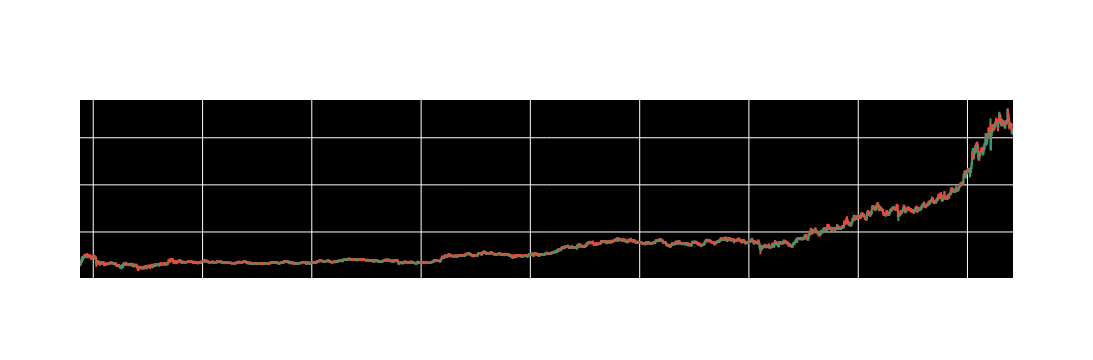

In [14]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False,  
                  plot_bgcolor='black', 
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True),
                  font=dict(color='white'))
fig.show()

In [15]:
df = df.drop('Date', axis = 1)

C:\Users\Pulse Electronics\AppData\Local\Temp\ipykernel_14380\32236560.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [16]:
df.head()

Price         Close         High          Low         Open       Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
0         32.764317    35.662950    27.081042    29.246875    855215656
1         31.087019    33.871660    30.891605    33.871660    126671715
2         33.203999    33.497118    29.426006    31.103303    116725709
3         33.513412    34.197360    33.220293    34.067083     67931378
4         37.258839    39.082698    33.220295    39.082698    106320954

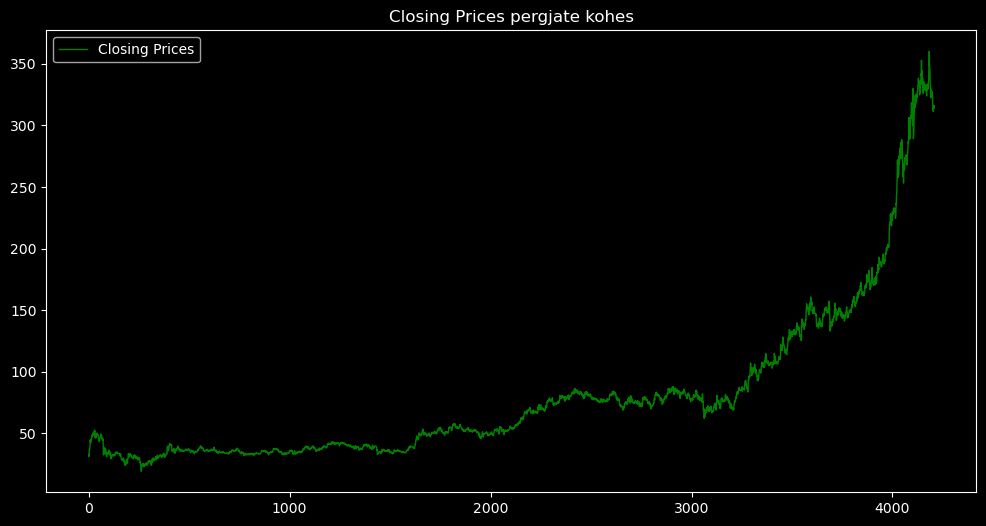

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = 'Closing Prices', linewidth = 1, color='green', alpha=1)
plt.title('Closing Prices pergjate kohes')
plt.legend()
plt.show()

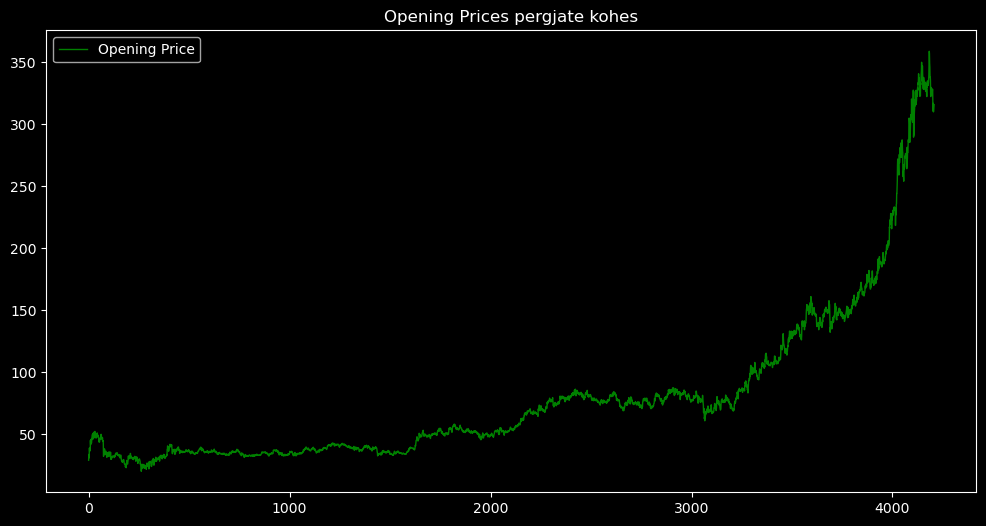

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = 'Opening Price', linewidth = 1, color='green', alpha=1)
plt.title('Opening Prices pergjate kohes')
plt.legend()
plt.show()

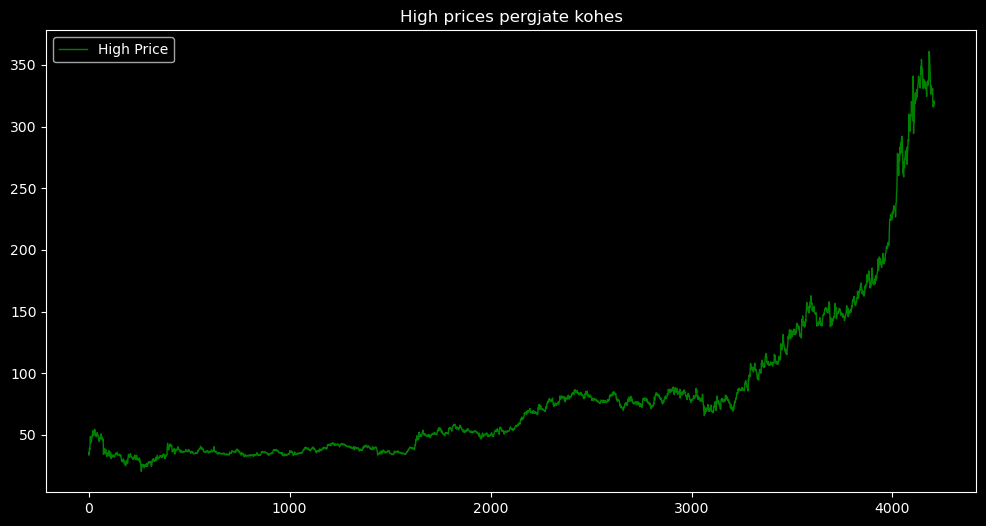

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label ='High Price', linewidth = 1, color='green', alpha=1)
plt.title('High prices pergjate kohes')
plt.legend()
plt.show()

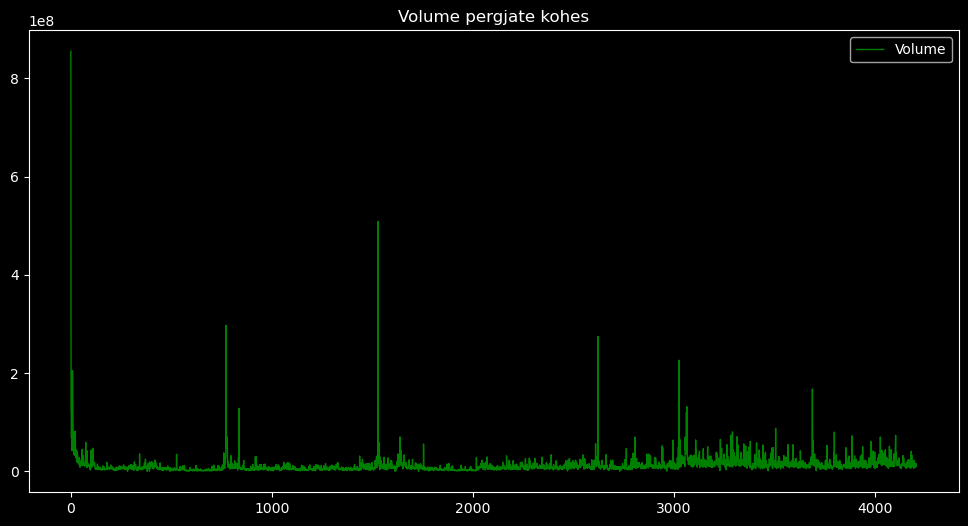

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = 'Volume', linewidth = 1, color='green', alpha=1)
plt.title('Volume pergjate kohes')
plt.legend()
plt.show()

In [21]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [22]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [23]:
df01.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0

In [24]:
ma100 = df.Close.rolling(100).mean()

In [25]:
ma100

Ticker  POWERGRID.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
4203      328.794317
4204      329.038712
4205      329.277424
4206      329.479301
4207      329.617329

[4208 rows x 1 columns]

In [26]:
ma200 = df.Close.rolling(200).mean()

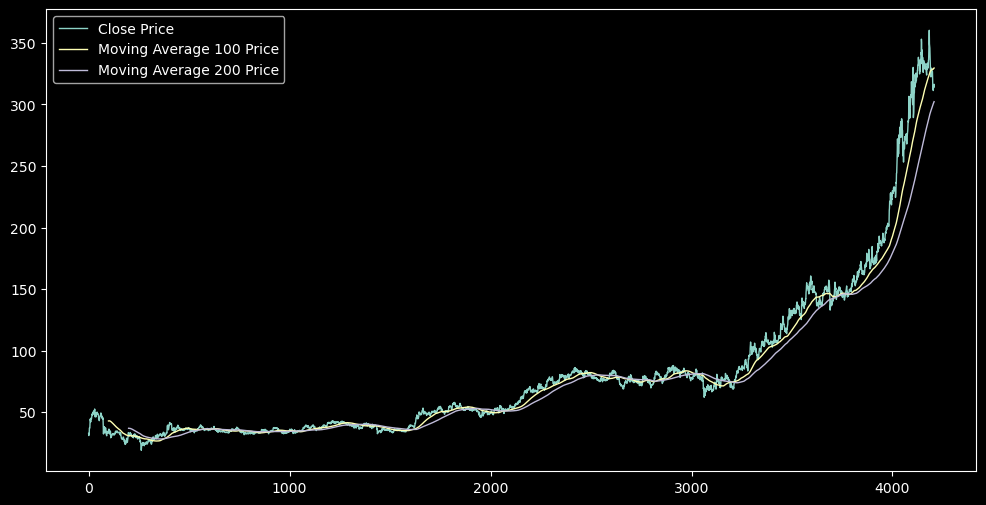

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = 'Close Price', linewidth = 1)
plt.plot(ma100, label = 'Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = 'Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [28]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [29]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

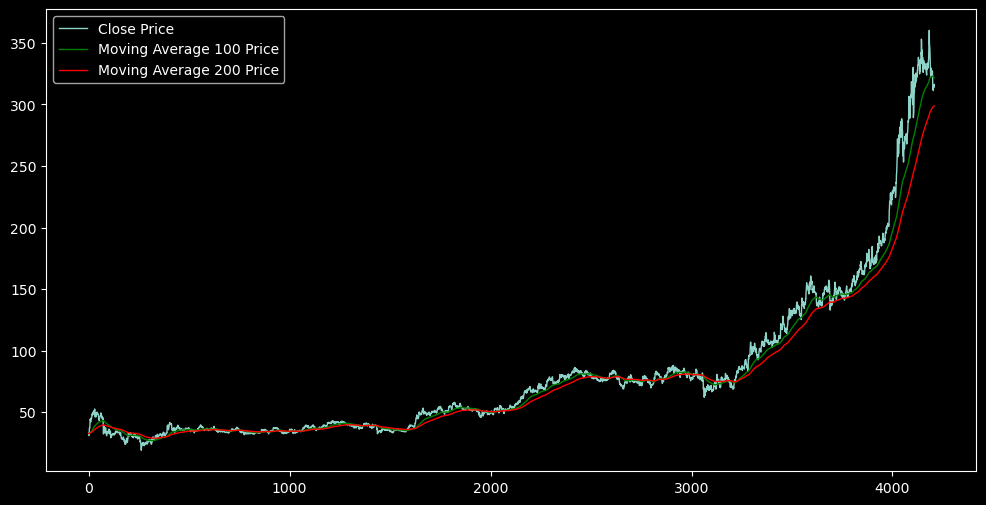

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = 'Close Price', linewidth = 1)
plt.plot(ema100, label = 'Moving Average 100 Price', linewidth = 1, color='green')
plt.plot(ema200, label = 'Moving Average 200 Price', linewidth = 1, color='red')
plt.legend()
plt.show()

In [31]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [32]:
data_training.shape

(2945, 1)

In [33]:
data_testing.shape

(1263, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [35]:
data_training_array = scaler.fit_transform(data_training)

In [36]:
data_training_array

array([[0.19808601],
       [0.17371823],
       [0.20447371],
       ...,
       [0.90774447],
       [0.86000409],
       [0.87299663]])

In [37]:
data_training_array.shape[0]

2945

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [39]:
x_train.shape

(2845, 100, 1)

In [39]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.21-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.69.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.w

In [40]:
# Model Building
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [41]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 208ms/step - loss: 0.0804
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - loss: 0.0084
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 0.0070
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 0.0069
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - loss: 0.0061
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - loss: 0.0057
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - loss: 0.0055
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - loss: 0.0050
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - loss: 0.0049
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - loss: 0.0055
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 0.0045
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - loss: 0.0038
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - loss: 0.0041
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - loss: 0.0036
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [44]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
final_df.head()

Ticker  POWERGRID.NS
0          76.617516
1          78.179443
2          78.446640
3          78.282211
4          78.734367

In [47]:
input_data = scaler.fit_transform(final_df)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [49]:
x_test.shape

(1263, 100, 1)

In [50]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step


In [51]:
y_predicted.shape

(1263, 1)

In [52]:
scaler.scale_

array([0.00335446])

In [53]:
scaler_factor = 1 / 0.00335466
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

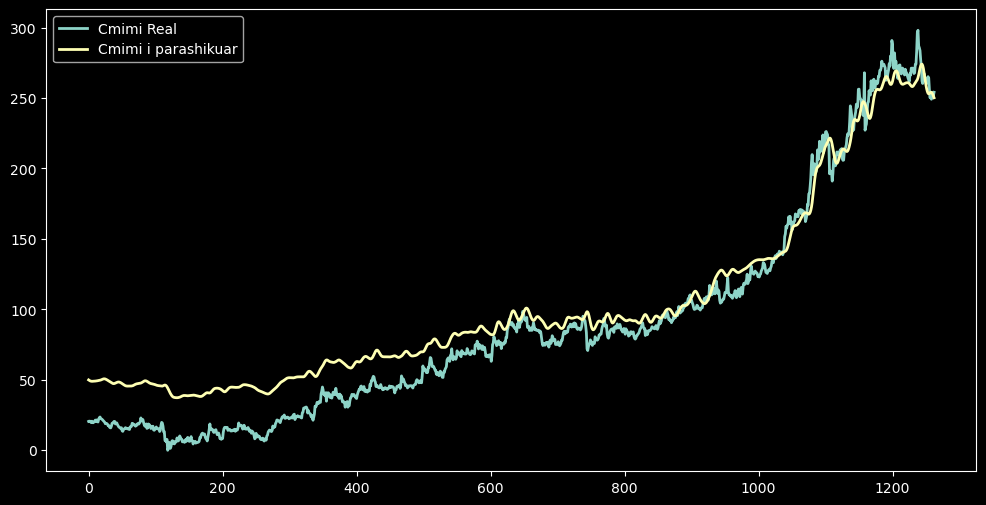

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Cmimi Real', linestyle='-', linewidth = 2)
plt.plot(y_predicted, label = 'Cmimi i parashikuar', linestyle='-', linewidth = 2)
plt.legend()
plt.show()

In [131]:
model.save('stock_dl_model.h5')